#### Similarity

In [ ]:
import gspread
import pandas as pd
from google.auth.transport.requests import Request
from google.oauth2 import service_account
from google.oauth2.service_account import Credentials

# Define the scope and credentials
scopes = ['https://www.googleapis.com/auth/spreadsheets', 'https://www.googleapis.com/auth/drive']
creds = Credentials.from_service_account_file('Supply_cred.json', scopes=scopes)

# Authorize the client
client = gspread.authorize(creds)   

# Open the Google Sheet by its title
sheet = client.open('Agra Buyer Profiling')

# Read data from a specific worksheet
worksheet = sheet.worksheet('Clothing Profiling')  # Replace 'Sheet1' with the actual sheet name
data = worksheet.get_all_records()
df = pd.DataFrame(data)

In [2]:
df=df[['Buyer Number',
       'Shirt -  Starting Purchasing Price', 'Shirt -  End Purchasing Price',
       'Jeans -  Starting Purchasing Price', 'Jeans -  End Purchasing Price',
       'T-Shirts -  Starting Purchasing Price',
       'T-Shirts -  End Purchasing Price',
       'Shorts -  Starting Purchasing Price', 'Shorts -  End Purchasing Price',
       'Track Pants -  Starting Purchasing Price',
       'Track Pants -  End Purchasing Price',
       'Trousers -  Starting Purchasing Price',
       'Trousers -  End Purchasing Price',
       'Track Suits -  Starting Purchasing Price',
       'Track Suits -  End Purchasing Price',
       'Kurta -  Starting Purchasing Price', 'Kurta -  End Purchasing Price']]

In [43]:
df.head()

,Timestamp,Email Address,Buyer Number,Shop Name,Shop Owner Name,Pincode,Market Name,Upload Shop Photo/Visiting card,Deals in -,Shirt - Starting Purchasing Price,...,Shorts - Starting Purchasing Price,Shorts - End Purchasing Price,Track Pants - Starting Purchasing Price,Track Pants - End Purchasing Price,Trousers - Starting Purchasing Price,Trousers - End Purchasing Price,Track Suits - Starting Purchasing Price,Track Suits - End Purchasing Price,Kurta - Starting Purchasing Price,Kurta - End Purchasing Price
0,6/5/2024 20:54:22,gandharv.sharma@bijnis.com,8800096381,Gandharv Garments,Gandharv,282010,Shahganj,https://drive.google.com/open?id=1AcWMFFh6t1Ln...,Men,150,...,100,250,200,600,350,700,600,850,300,550
1,6/6/2024 12:30:49,mohammad.sameer@bijnis.com,7060752846,Kk standard choice,Saif,282003,Sindhi Bazaar,https://drive.google.com/open?id=123Jn_gS1Uo2m...,Men,150,...,100,150,150,200,250,400,550,600,300,500
2,6/6/2024 13:11:42,mohammad.sameer@bijnis.com,7300766670,Utsav fashion point,Har singh,282001,Rajpur Chungi,https://drive.google.com/open?id=1mi2vS1c1RY11...,Men,250,...,,,,,400,600,,,450,850
3,6/6/2024 13:59:13,mohammad.sameer@bijnis.com,8755475838,Gujrat sales,Raj,282005,New Agra/Dayalbagh,https://drive.google.com/open?id=1BGduCy17AfjC...,Men,150,...,,,200,350,350,450,,,,
4,6/6/2024 14:03:14,gandharv.sharma@bijnis.com,9027478173,Shagun saree,Aftab,282005,Shahganj,https://drive.google.com/open?id=1o5xWomJLvfYs...,Women,,...,,,,,,,,,,


In [3]:
flattened_data=[]
grouped = df.groupby('Buyer Number')

# Iterate over each group
for BuyerNumber, group_df in grouped:
    # Iterate over each row in the group
    for idx, row in group_df.iterrows():
        # Iterate over each column
        for column, value in row.items():
            # If the column is not 'buyerId' and the value is not 0, add it to the flattened data
            if column != 'Buyer Number' and value != 0:
                flattened_data.append({'Buyer Number': BuyerNumber, 'Item': column, 'Value': value})

# Create a new DataFrame from the flattened data
flattened_df = pd.DataFrame(flattened_data)
import numpy as np
flattened_df=flattened_df.replace('',np.nan)
flattened_df=flattened_df.fillna(0)
flattened_df=flattened_df[flattened_df['Value'].astype(int)!=0]
flattened_df['Item'] = flattened_df['Item'].str.replace('T-Shirts -  Starting Purchasing Price', 'TShirts -  Starting Purchasing Price')
flattened_df['Item'] = flattened_df['Item'].str.replace('T-Shirts -  End Purchasing Price', 'TShirts -  End Purchasing Price')

In [4]:
flattened_df[flattened_df['Buyer Number']==783019065]


,Buyer Number,Item,Value
0,783019065,Shirt - Starting Purchasing Price,150.0
1,783019065,Shirt - End Purchasing Price,200.0
2,783019065,Jeans - Starting Purchasing Price,250.0
3,783019065,Jeans - End Purchasing Price,400.0
4,783019065,TShirts - Starting Purchasing Price,100.0
5,783019065,TShirts - End Purchasing Price,250.0
6,783019065,Shorts - Starting Purchasing Price,100.0
7,783019065,Shorts - End Purchasing Price,150.0
8,783019065,Track Pants - Starting Purchasing Price,100.0
9,783019065,Track Pants - End Purchasing Price,200.0


In [5]:
split_df = flattened_df['Item'].str.split(' - ', expand=True)
flattened_df['Item'] = split_df[0]
flattened_df['Description'] = split_df[1]

In [6]:
flattened_df

,Buyer Number,Item,Value,Description
0,783019065,Shirt,150.0,Starting Purchasing Price
1,783019065,Shirt,200.0,End Purchasing Price
2,783019065,Jeans,250.0,Starting Purchasing Price
3,783019065,Jeans,400.0,End Purchasing Price
4,783019065,TShirts,100.0,Starting Purchasing Price
...,...,...,...,...
1155,9927401576,Jeans,950.0,End Purchasing Price
1156,9927401576,TShirts,200.0,Starting Purchasing Price
1157,9927401576,TShirts,400.0,End Purchasing Price
1166,9927401576,Kurta,400.0,Starting Purchasing Price


In [7]:
flattened_df[flattened_df['Buyer Number']==783019065]

,Buyer Number,Item,Value,Description
0,783019065,Shirt,150.0,Starting Purchasing Price
1,783019065,Shirt,200.0,End Purchasing Price
2,783019065,Jeans,250.0,Starting Purchasing Price
3,783019065,Jeans,400.0,End Purchasing Price
4,783019065,TShirts,100.0,Starting Purchasing Price
5,783019065,TShirts,250.0,End Purchasing Price
6,783019065,Shorts,100.0,Starting Purchasing Price
7,783019065,Shorts,150.0,End Purchasing Price
8,783019065,Track Pants,100.0,Starting Purchasing Price
9,783019065,Track Pants,200.0,End Purchasing Price


In [8]:
flattened_df.shape

(702, 4)

In [9]:
flattened_df_sp=flattened_df[flattened_df['Description']==' Starting Purchasing Price']
flattened_df_ep=flattened_df[flattened_df['Description']==' End Purchasing Price']

In [10]:
flattened_df_sp=flattened_df_sp.rename(columns={'Value':'Start_Price'})
flattened_df_sp=flattened_df_sp.drop('Description',axis=1)
flattened_df_ep=flattened_df_ep.rename(columns={'Value':'End_Price'})
flattened_df_ep=flattened_df_ep.drop('Description',axis=1)

In [11]:
flattened_df_ep

,Buyer Number,Item,End_Price
1,783019065,Shirt,200.0
3,783019065,Jeans,400.0
5,783019065,TShirts,250.0
7,783019065,Shorts,150.0
9,783019065,Track Pants,200.0
...,...,...,...
1135,9897361592,Kurta,850.0
1153,9927401576,Shirt,350.0
1155,9927401576,Jeans,950.0
1157,9927401576,TShirts,400.0


In [12]:
flattened_final=pd.merge(flattened_df_sp,flattened_df_ep,on=['Buyer Number','Item'])
flattened_final

,Buyer Number,Item,Start_Price,End_Price
0,783019065,Shirt,150.0,200.0
1,783019065,Jeans,250.0,400.0
2,783019065,TShirts,100.0,250.0
3,783019065,Shorts,100.0,150.0
4,783019065,Track Pants,100.0,200.0
...,...,...,...,...
346,9897361592,Kurta,500.0,850.0
347,9927401576,Shirt,250.0,350.0
348,9927401576,Jeans,650.0,950.0
349,9927401576,TShirts,200.0,400.0


In [13]:
flattened_final.Start_Price.unique()

array([150., 250., 100., 450., 500., 300., 350., 400., 750., 200., 550.,
        50., 600., 700., 650.])

In [14]:
def pricebucket(x):
    if x>=0 and x<=200:
        return '0-200'
    elif x>=201 and x<=300:
        return '201-300'
    elif x>=301 and x<=400:
        return '301-400'
    elif x>=401 and x<=500:
        return '401-500'
    else :
        return '500 +'
flattened_final[['start_price_bucket', 'end_price_bucket']] = flattened_final[['Start_Price', 'End_Price']].applymap(pricebucket)

In [15]:
flattened_final

,Buyer Number,Item,Start_Price,End_Price,start_price_bucket,end_price_bucket
0,783019065,Shirt,150.0,200.0,0-200,0-200
1,783019065,Jeans,250.0,400.0,201-300,301-400
2,783019065,TShirts,100.0,250.0,0-200,201-300
3,783019065,Shorts,100.0,150.0,0-200,0-200
4,783019065,Track Pants,100.0,200.0,0-200,0-200
...,...,...,...,...,...,...
346,9897361592,Kurta,500.0,850.0,401-500,500 +
347,9927401576,Shirt,250.0,350.0,201-300,301-400
348,9927401576,Jeans,650.0,950.0,500 +,500 +
349,9927401576,TShirts,200.0,400.0,0-200,301-400


In [16]:
flattened_final[flattened_final['Buyer Number']==783019065]

,Buyer Number,Item,Start_Price,End_Price,start_price_bucket,end_price_bucket
0,783019065,Shirt,150.0,200.0,0-200,0-200
1,783019065,Jeans,250.0,400.0,201-300,301-400
2,783019065,TShirts,100.0,250.0,0-200,201-300
3,783019065,Shorts,100.0,150.0,0-200,0-200
4,783019065,Track Pants,100.0,200.0,0-200,0-200


In [17]:
flattened_final['SimilarityColumn']=flattened_final['Item']+'_'+flattened_final['start_price_bucket']+'_'+flattened_final['end_price_bucket']
flattened_final

,Buyer Number,Item,Start_Price,End_Price,start_price_bucket,end_price_bucket,SimilarityColumn
0,783019065,Shirt,150.0,200.0,0-200,0-200,Shirt_0-200_0-200
1,783019065,Jeans,250.0,400.0,201-300,301-400,Jeans_201-300_301-400
2,783019065,TShirts,100.0,250.0,0-200,201-300,TShirts_0-200_201-300
3,783019065,Shorts,100.0,150.0,0-200,0-200,Shorts_0-200_0-200
4,783019065,Track Pants,100.0,200.0,0-200,0-200,Track Pants_0-200_0-200
...,...,...,...,...,...,...,...
346,9897361592,Kurta,500.0,850.0,401-500,500 +,Kurta_401-500_500 +
347,9927401576,Shirt,250.0,350.0,201-300,301-400,Shirt_201-300_301-400
348,9927401576,Jeans,650.0,950.0,500 +,500 +,Jeans_500 +_500 +
349,9927401576,TShirts,200.0,400.0,0-200,301-400,TShirts_0-200_301-400


In [18]:
database=flattened_final[['Buyer Number','SimilarityColumn']]
database

,Buyer Number,SimilarityColumn
0,783019065,Shirt_0-200_0-200
1,783019065,Jeans_201-300_301-400
2,783019065,TShirts_0-200_201-300
3,783019065,Shorts_0-200_0-200
4,783019065,Track Pants_0-200_0-200
...,...,...
346,9897361592,Kurta_401-500_500 +
347,9927401576,Shirt_201-300_301-400
348,9927401576,Jeans_500 +_500 +
349,9927401576,TShirts_0-200_301-400


In [19]:
buyer_grouped = database.groupby('Buyer Number')['SimilarityColumn'].apply(lambda x: ', '.join(x)).reset_index()
buyer_grouped

,Buyer Number,SimilarityColumn
0,783019065,"Shirt_0-200_0-200, Jeans_201-300_301-400, TShi..."
1,6395903414,"Shirt_401-500_500 +, Jeans_401-500_500 +, TShi..."
2,6396923813,"Shirt_0-200_301-400, Jeans_301-400_500 +, TShi..."
3,6397223944,"Shirt_0-200_201-300, Jeans_301-400_401-500, TS..."
4,6397826848,"Shirt_0-200_201-300, Jeans_301-400_401-500, TS..."
...,...,...
58,9870658614,"Shirt_0-200_201-300, Jeans_301-400_500 +, TShi..."
59,9897121462,"Shirt_0-200_301-400, Jeans_401-500_500 +, TShi..."
60,9897280640,"Shirt_0-200_301-400, Jeans_301-400_401-500, TS..."
61,9897361592,"Shirt_301-400_500 +, Jeans_500 +_500 +, TShirt..."


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(database['SimilarityColumn'])

In [21]:
similarity_matrix = cosine_similarity(X)

In [22]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Function to calculate similarity score between two buyers
def calculate_similarity(buyer1, buyer2, database):
    # Get the items purchased by each buyer
    items1 = database[database['Buyer Number'] == buyer1]['SimilarityColumn'].tolist()
    items2 = database[database['Buyer Number'] == buyer2]['SimilarityColumn'].tolist()
    text1 = ' '.join(items1)
    text2 = ' '.join(items2)
    
    # Create TF-IDF vectorizer
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform([text1, text2])
    
    # Calculate cosine similarity
    similarity_score = cosine_similarity(X)[0][1]
    
    return similarity_score

# Calculate similarity score for each buyer with every other buyer
buyer_numbers = database['Buyer Number'].unique()
similarity_data = []

for i in range(len(buyer_numbers)):
    for j in range(i+1, len(buyer_numbers)):
        buyer1 = buyer_numbers[i]
        buyer2 = buyer_numbers[j]
        similarity_score = calculate_similarity(buyer1, buyer2, database)
        similarity_data.append({'Buyer1': buyer1, 'Buyer2': buyer2, 'Similarity': similarity_score})

# Create DataFrame from similarity data
similarity_df = pd.DataFrame(similarity_data)

print("Similarity scores between each pair of buyers:")
print(similarity_df)


Similarity scores between each pair of buyers:
          Buyer1      Buyer2  Similarity
0      783019065  6395903414    0.039386
1      783019065  6396923813    0.167262
2      783019065  6397223944    0.597473
3      783019065  6397826848    0.517630
4      783019065  6398930169    1.000000
...          ...         ...         ...
1948  9897121462  9897361592    0.434654
1949  9897121462  9927401576    0.276767
1950  9897280640  9897361592    0.123898
1951  9897280640  9927401576    0.320159
1952  9897361592  9927401576    0.373975

[1953 rows x 3 columns]


In [23]:
similarity_df=pd.merge(similarity_df,buyer_grouped,left_on='Buyer1',right_on='Buyer Number')
similarity_df=similarity_df.rename(columns={'SimilarityColumn':'Buyer1Group'})
similarity_df=pd.merge(similarity_df,buyer_grouped,left_on='Buyer2',right_on='Buyer Number')
similarity_df=similarity_df.rename(columns={'SimilarityColumn':'Buyer2Group'})
similarity_df=similarity_df.drop(['Buyer Number_y','Buyer Number_x'],axis=1)

In [24]:
flattened_final[flattened_final['Buyer Number']==783019065]

,Buyer Number,Item,Start_Price,End_Price,start_price_bucket,end_price_bucket,SimilarityColumn
0,783019065,Shirt,150.0,200.0,0-200,0-200,Shirt_0-200_0-200
1,783019065,Jeans,250.0,400.0,201-300,301-400,Jeans_201-300_301-400
2,783019065,TShirts,100.0,250.0,0-200,201-300,TShirts_0-200_201-300
3,783019065,Shorts,100.0,150.0,0-200,0-200,Shorts_0-200_0-200
4,783019065,Track Pants,100.0,200.0,0-200,0-200,Track Pants_0-200_0-200


In [25]:
flattened_final[flattened_final['Buyer Number']==6398930169]

,Buyer Number,Item,Start_Price,End_Price,start_price_bucket,end_price_bucket,SimilarityColumn
28,6398930169,Shirt,150.0,250.0,0-200,201-300,Shirt_0-200_201-300
29,6398930169,Jeans,300.0,400.0,201-300,301-400,Jeans_201-300_301-400
30,6398930169,TShirts,100.0,200.0,0-200,0-200,TShirts_0-200_0-200
31,6398930169,Shorts,100.0,150.0,0-200,0-200,Shorts_0-200_0-200
32,6398930169,Track Pants,100.0,150.0,0-200,0-200,Track Pants_0-200_0-200


In [26]:
similarity_df[similarity_df['Similarity']>=0.90]

,Buyer1,Buyer2,Similarity,Buyer1Group,Buyer2Group
10,783019065,6398930169,1.000000,"Shirt_0-200_0-200, Jeans_201-300_301-400, TShi...","Shirt_0-200_201-300, Jeans_201-300_301-400, TS..."
78,783019065,7906333316,0.945235,"Shirt_0-200_0-200, Jeans_201-300_301-400, TShi...","Shirt_0-200_201-300, Jeans_201-300_301-400, TS..."
83,6398930169,7906333316,0.945235,"Shirt_0-200_201-300, Jeans_201-300_301-400, TS...","Shirt_0-200_201-300, Jeans_201-300_301-400, TS..."
105,783019065,7906873695,0.927025,"Shirt_0-200_0-200, Jeans_201-300_301-400, TShi...","Shirt_0-200_0-200, Jeans_201-300_301-400, TShi..."
110,6398930169,7906873695,0.927025,"Shirt_0-200_201-300, Jeans_201-300_301-400, TS...","Shirt_0-200_0-200, Jeans_201-300_301-400, TShi..."
118,7906333316,7906873695,0.902443,"Shirt_0-200_201-300, Jeans_201-300_301-400, TS...","Shirt_0-200_0-200, Jeans_201-300_301-400, TShi..."
256,6397223944,8266919237,0.949376,"Shirt_0-200_201-300, Jeans_301-400_401-500, TS...","Shirt_0-200_201-300, Jeans_301-400_401-500, TS..."
351,783019065,8307779773,0.906813,"Shirt_0-200_0-200, Jeans_201-300_301-400, TShi...","Shirt_0-200_301-400, Jeans_201-300_301-400, TS..."
356,6398930169,8307779773,0.906813,"Shirt_0-200_201-300, Jeans_201-300_301-400, TS...","Shirt_0-200_301-400, Jeans_201-300_301-400, TS..."
364,7906333316,8307779773,0.904357,"Shirt_0-200_201-300, Jeans_201-300_301-400, TS...","Shirt_0-200_301-400, Jeans_201-300_301-400, TS..."


In [27]:
similarity_df.to_excel('Buyer_SImilarity_data.xlsx',index=False)

In [31]:
similarity_df[similarity_df['Buyer1']==783019065]['Buyer1Group'][0]

'Shirt_0-200_0-200, Jeans_201-300_301-400, TShirts_0-200_201-300, Shorts_0-200_0-200, Track Pants_0-200_0-200'

In [33]:
similarity_df[similarity_df['Similarity']>=0.98]

,Buyer1,Buyer2,Similarity,Buyer1Group,Buyer2Group
10,783019065,6398930169,1.0,"Shirt_0-200_0-200, Jeans_201-300_301-400, TShi...","Shirt_0-200_201-300, Jeans_201-300_301-400, TS..."
741,783019065,9027707094,1.0,"Shirt_0-200_0-200, Jeans_201-300_301-400, TShi...","Shirt_0-200_201-300, Jeans_201-300_301-400, TS..."
746,6398930169,9027707094,1.0,"Shirt_0-200_201-300, Jeans_201-300_301-400, TS...","Shirt_0-200_201-300, Jeans_201-300_301-400, TS..."


In [34]:
final = flattened_final.groupby('Buyer Number')['Item'].apply(lambda x: ', '.join(x)).reset_index()
final.head()

,Buyer Number,Item
0,783019065,"Shirt, Jeans, TShirts, Shorts, Track Pants"
1,6395903414,"Shirt, Jeans, TShirts, Shorts, Track Pants, Tr..."
2,6396923813,"Shirt, Jeans, TShirts, Track Pants"
3,6397223944,"Shirt, Jeans, TShirts, Shorts, Track Pants, Tr..."
4,6397826848,"Shirt, Jeans, TShirts, Shorts, Track Pants, Tr..."


In [36]:
final_df_new=final.groupby('Item')['Buyer Number'].count().reset_index()
final_df_new


,Item,Buyer Number
0,"Shirt, Jeans, TShirts",3
1,"Shirt, Jeans, TShirts, Kurta",2
2,"Shirt, Jeans, TShirts, Shorts, Track Pants",12
3,"Shirt, Jeans, TShirts, Shorts, Track Pants, Tr...",15
4,"Shirt, Jeans, TShirts, Shorts, Track Pants, Tr...",5
5,"Shirt, Jeans, TShirts, Shorts, Track Pants, Tr...",3
6,"Shirt, Jeans, TShirts, Shorts, Track Pants, Tr...",8
7,"Shirt, Jeans, TShirts, Track Pants",7
8,"Shirt, Jeans, TShirts, Track Pants, Kurta",1
9,"Shirt, Jeans, TShirts, Track Pants, Trousers",4


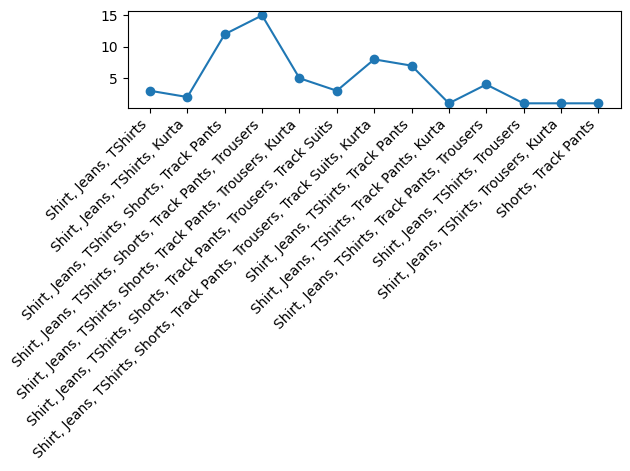

In [39]:
import matplotlib.pyplot as plt
import mplcursors

plt.plot(final_df_new['Item'], final_df_new['Buyer Number'], marker='o') 
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()  # Automatically adjust the layout to fit everything

# Adding interactive cursor
cursor = mplcursors.cursor(hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(
    f'Item: {final_df_new["Item"][sel.target.index]}\nBuyer Number: {final_df_new["Buyer Number"][sel.target.index]}'))

plt.show()


In [41]:
import plotly.express as px
fig = px.line(final_df_new, x='Item', y='Buyer Number', markers=True, title='Item vs Buyer Number')

# Show the figure
fig.show()

#### Clustering

In [80]:
import gspread
import pandas as pd
from google.auth.transport.requests import Request
from google.oauth2 import service_account
from google.oauth2.service_account import Credentials

# Define the scope and credentials
scopes = ['https://www.googleapis.com/auth/spreadsheets', 'https://www.googleapis.com/auth/drive']
creds = Credentials.from_service_account_file('Supply_cred.json', scopes=scopes)

# Authorize the client
client = gspread.authorize(creds)   

# Open the Google Sheet by its title
sheet = client.open('Agra Buyer Profiling')

# Read data from a specific worksheet
worksheet = sheet.worksheet('Clothing Profiling')  # Replace 'Sheet1' with the actual sheet name
data = worksheet.get_all_records()
df = pd.DataFrame(data)

In [81]:
## shollow copy
df1=df.copy()

In [82]:
df.head()

,Timestamp,Email Address,Buyer Number,Shop Name,Shop Owner Name,Pincode,Market Name,Upload Shop Photo/Visiting card,Deals in -,Shirt - Starting Purchasing Price,...,Shorts - Starting Purchasing Price,Shorts - End Purchasing Price,Track Pants - Starting Purchasing Price,Track Pants - End Purchasing Price,Trousers - Starting Purchasing Price,Trousers - End Purchasing Price,Track Suits - Starting Purchasing Price,Track Suits - End Purchasing Price,Kurta - Starting Purchasing Price,Kurta - End Purchasing Price
0,6/5/2024 20:54:22,gandharv.sharma@bijnis.com,8800096381,Gandharv Garments,Gandharv,282010,Shahganj,https://drive.google.com/open?id=1AcWMFFh6t1Ln...,Men,150,...,100,250,200,600,350,700,600,850,300,550
1,6/6/2024 12:30:49,mohammad.sameer@bijnis.com,7060752846,Kk standard choice,Saif,282003,Sindhi Bazaar,https://drive.google.com/open?id=123Jn_gS1Uo2m...,Men,150,...,100,150,150,200,250,400,550,600,300,500
2,6/6/2024 13:11:42,mohammad.sameer@bijnis.com,7300766670,Utsav fashion point,Har singh,282001,Rajpur Chungi,https://drive.google.com/open?id=1mi2vS1c1RY11...,Men,250,...,,,,,400,600,,,450,850
3,6/6/2024 13:59:13,mohammad.sameer@bijnis.com,8755475838,Gujrat sales,Raj,282005,New Agra/Dayalbagh,https://drive.google.com/open?id=1BGduCy17AfjC...,Men,150,...,,,200,350,350,450,,,,
4,6/6/2024 14:03:14,gandharv.sharma@bijnis.com,9027478173,Shagun saree,Aftab,282005,Shahganj,https://drive.google.com/open?id=1o5xWomJLvfYs...,Women,,...,,,,,,,,,,


In [83]:
df=df[['Buyer Number',
       'Shirt -  Starting Purchasing Price', 'Shirt -  End Purchasing Price',
       'Jeans -  Starting Purchasing Price', 'Jeans -  End Purchasing Price',
       'T-Shirts -  Starting Purchasing Price',
       'T-Shirts -  End Purchasing Price',
       'Shorts -  Starting Purchasing Price', 'Shorts -  End Purchasing Price',
       'Track Pants -  Starting Purchasing Price',
       'Track Pants -  End Purchasing Price',
       'Trousers -  Starting Purchasing Price',
       'Trousers -  End Purchasing Price',
       'Track Suits -  Starting Purchasing Price',
       'Track Suits -  End Purchasing Price',
       'Kurta -  Starting Purchasing Price', 'Kurta -  End Purchasing Price']]

In [84]:
df=df.fillna(0)
df=df.replace('',0)
df.head()

,Buyer Number,Shirt - Starting Purchasing Price,Shirt - End Purchasing Price,Jeans - Starting Purchasing Price,Jeans - End Purchasing Price,T-Shirts - Starting Purchasing Price,T-Shirts - End Purchasing Price,Shorts - Starting Purchasing Price,Shorts - End Purchasing Price,Track Pants - Starting Purchasing Price,Track Pants - End Purchasing Price,Trousers - Starting Purchasing Price,Trousers - End Purchasing Price,Track Suits - Starting Purchasing Price,Track Suits - End Purchasing Price,Kurta - Starting Purchasing Price,Kurta - End Purchasing Price
0,8800096381,150,250,300,550,150,400,100,250,200,600,350,700,600,850,300,550
1,7060752846,150,500,350,500,150,250,100,150,150,200,250,400,550,600,300,500
2,7300766670,250,450,400,550,200,400,0,0,0,0,400,600,0,0,450,850
3,8755475838,150,350,400,500,200,350,0,0,200,350,350,450,0,0,0,0
4,9027478173,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Get the columns to be standardized (all columns except the first one)
columns_to_standardize = df.columns[1:]
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

# Display the standardized DataFrame
df.head()

,Buyer Number,Shirt - Starting Purchasing Price,Shirt - End Purchasing Price,Jeans - Starting Purchasing Price,Jeans - End Purchasing Price,T-Shirts - Starting Purchasing Price,T-Shirts - End Purchasing Price,Shorts - Starting Purchasing Price,Shorts - End Purchasing Price,Track Pants - Starting Purchasing Price,Track Pants - End Purchasing Price,Trousers - Starting Purchasing Price,Trousers - End Purchasing Price,Track Suits - Starting Purchasing Price,Track Suits - End Purchasing Price,Kurta - Starting Purchasing Price,Kurta - End Purchasing Price
0,8800096381,-0.308750,-0.295939,-0.109429,0.262225,0.257397,0.584985,0.404573,0.887586,0.861164,2.113519,1.025751,1.451512,2.265205,2.154180,1.434505,1.408342
1,7060752846,-0.308750,1.072780,0.202023,0.079162,0.257397,-0.202086,0.404573,0.169757,0.281835,-0.144971,0.467622,0.449224,2.042002,1.401539,1.434505,1.232892
2,7300766670,0.663484,0.799036,0.513476,0.262225,0.871827,0.584985,-0.956264,-0.906987,-1.456150,-1.274215,1.304815,1.117416,-0.413226,-0.404799,2.414382,2.461043
3,8755475838,-0.308750,0.251548,0.513476,0.079162,0.871827,0.322628,-0.956264,-0.906987,0.861164,0.701963,1.025751,0.616272,-0.413226,-0.404799,-0.525249,-0.521608
4,9027478173,-1.767100,-1.664658,-1.978145,-1.751467,-1.585895,-1.513870,-0.956264,-0.906987,-1.456150,-1.274215,-0.927701,-0.887160,-0.413226,-0.404799,-0.525249,-0.521608


In [86]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[columns_to_standardize])

c:\Users\Akhil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [87]:
df

,Buyer Number,Shirt - Starting Purchasing Price,Shirt - End Purchasing Price,Jeans - Starting Purchasing Price,Jeans - End Purchasing Price,T-Shirts - Starting Purchasing Price,T-Shirts - End Purchasing Price,Shorts - Starting Purchasing Price,Shorts - End Purchasing Price,Track Pants - Starting Purchasing Price,Track Pants - End Purchasing Price,Trousers - Starting Purchasing Price,Trousers - End Purchasing Price,Track Suits - Starting Purchasing Price,Track Suits - End Purchasing Price,Kurta - Starting Purchasing Price,Kurta - End Purchasing Price,Cluster
0,8800096381,-0.308750,-0.295939,-0.109429,0.262225,0.257397,0.584985,0.404573,0.887586,0.861164,2.113519,1.025751,1.451512,2.265205,2.154180,1.434505,1.408342,3
1,7060752846,-0.308750,1.072780,0.202023,0.079162,0.257397,-0.202086,0.404573,0.169757,0.281835,-0.144971,0.467622,0.449224,2.042002,1.401539,1.434505,1.232892,0
2,7300766670,0.663484,0.799036,0.513476,0.262225,0.871827,0.584985,-0.956264,-0.906987,-1.456150,-1.274215,1.304815,1.117416,-0.413226,-0.404799,2.414382,2.461043,0
3,8755475838,-0.308750,0.251548,0.513476,0.079162,0.871827,0.322628,-0.956264,-0.906987,0.861164,0.701963,1.025751,0.616272,-0.413226,-0.404799,-0.525249,-0.521608,0
4,9027478173,-1.767100,-1.664658,-1.978145,-1.751467,-1.585895,-1.513870,-0.956264,-0.906987,-1.456150,-1.274215,-0.927701,-0.887160,-0.413226,-0.404799,-0.525249,-0.521608,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,7906873695,-0.308750,-0.569683,-0.420882,-0.470026,-0.357034,-0.726800,-0.275845,-0.189158,-0.297493,0.701963,0.188557,0.115128,-0.413226,-0.404799,-0.525249,-0.521608,2
70,7060461307,0.177367,0.251548,0.202023,0.445288,-0.357034,0.322628,-0.956264,-0.906987,0.281835,-0.144971,-0.927701,-0.887160,-0.413226,-0.404799,-0.525249,-0.521608,2
71,9837300642,1.149600,0.525292,0.513476,0.811414,-0.357034,0.584985,1.084992,0.528672,0.281835,0.419652,1.304815,1.117416,-0.413226,-0.404799,-0.525249,-0.521608,0
72,9870658614,0.177367,-0.022195,0.513476,0.445288,0.257397,-0.202086,0.404573,0.169757,0.281835,0.137341,1.304815,1.117416,-0.413226,-0.404799,1.107879,0.881992,0


In [88]:
df[df['Cluster']==0]

,Buyer Number,Shirt - Starting Purchasing Price,Shirt - End Purchasing Price,Jeans - Starting Purchasing Price,Jeans - End Purchasing Price,T-Shirts - Starting Purchasing Price,T-Shirts - End Purchasing Price,Shorts - Starting Purchasing Price,Shorts - End Purchasing Price,Track Pants - Starting Purchasing Price,Track Pants - End Purchasing Price,Trousers - Starting Purchasing Price,Trousers - End Purchasing Price,Track Suits - Starting Purchasing Price,Track Suits - End Purchasing Price,Kurta - Starting Purchasing Price,Kurta - End Purchasing Price,Cluster
1,7060752846,-0.308750,1.072780,0.202023,0.079162,0.257397,-0.202086,0.404573,0.169757,0.281835,-0.144971,0.467622,0.449224,2.042002,1.401539,1.434505,1.232892,0
2,7300766670,0.663484,0.799036,0.513476,0.262225,0.871827,0.584985,-0.956264,-0.906987,-1.456150,-1.274215,1.304815,1.117416,-0.413226,-0.404799,2.414382,2.461043,0
3,8755475838,-0.308750,0.251548,0.513476,0.079162,0.871827,0.322628,-0.956264,-0.906987,0.861164,0.701963,1.025751,0.616272,-0.413226,-0.404799,-0.525249,-0.521608,0
12,8630669609,0.177367,0.251548,0.513476,0.079162,0.257397,-0.202086,0.404573,0.528672,0.861164,0.137341,0.467622,0.616272,-0.413226,-0.404799,-0.525249,-0.521608,0
16,8273961326,1.635717,1.072780,0.824929,0.445288,1.486258,1.634413,1.765410,1.246501,0.861164,0.701963,1.304815,1.284464,-0.413226,-0.404799,-0.525249,-0.521608,0
17,8410838426,0.663484,0.251548,0.824929,0.262225,0.257397,0.584985,0.404573,0.169757,0.861164,0.419652,1.304815,0.950368,1.818800,1.702595,-0.525249,-0.521608,0
18,8266919237,0.177367,-0.295939,0.513476,-0.103901,0.871827,-0.202086,0.404573,0.528672,0.861164,0.419652,0.746686,0.449224,-0.413226,-0.404799,1.107879,0.706542,0
19,8630024072,0.663484,0.799036,0.824929,1.726729,0.871827,0.322628,0.404573,0.887586,0.281835,0.701963,0.467622,0.950368,-0.413226,-0.404799,-0.525249,-0.521608,0
21,9719637443,0.177367,0.251548,0.202023,0.079162,0.257397,0.060271,0.404573,0.169757,0.281835,0.419652,0.746686,0.616272,1.818800,1.552067,-0.525249,-0.521608,0
22,9634620859,-0.308750,-0.022195,-0.420882,-0.103901,0.257397,-0.202086,0.404573,0.169757,0.281835,-0.144971,0.746686,0.449224,-0.413226,-0.404799,-0.525249,-0.521608,0


In [105]:
df_new=df[['Buyer Number','Cluster']]
df_final=pd.merge(df1,df_new,on='Buyer Number')
df_final.to_excel('Data_Buyer_Segment.xlsx',index=False)

In [92]:
import plotly.express as px
df_new=df.groupby('Cluster')['Buyer Number'].count().reset_index()
fig = px.line(df_new, x='Cluster', y='Buyer Number', markers=True, title='Cluster')

# Show the figure
fig.show()

In [102]:
fig = px.scatter(
    df, 
    x='Buyer Number', 
    y='Cluster', 
    color='Cluster', 
    title='Interactive Scatter Plot by Cluster',
    labels={'Buyer Number': 'Buyer Number', 'Cluster': 'Cluster'}
)

# Show the figure
fig.show()